In [16]:
from tpot import TPOTClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# AutoML
## TPOT
Here we will test and analize performace of automated machine learning process applied to our project task


In [2]:
# pip install tpot

![TPOT](https://raw.githubusercontent.com/EpistasisLab/tpot/master/images/tpot-ml-pipeline.png)

In [3]:
df = pd.read_csv("../Data/Modeling_dataset/credit_PRO.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          14000 non-null  int64  
 1   TARGET                      14000 non-null  int64  
 2   CNT_CHILDREN                14000 non-null  int64  
 3   AMT_INCOME_TOTAL            14000 non-null  float64
 4   AMT_CREDIT                  14000 non-null  float64
 5   AMT_ANNUITY                 14000 non-null  float64
 6   AMT_GOODS_PRICE             13990 non-null  float64
 7   REGION_POPULATION_RELATIVE  14000 non-null  float64
 8   DAYS_BIRTH                  14000 non-null  int64  
 9   DAYS_EMPLOYED               14000 non-null  int64  
 10  DAYS_REGISTRATION           14000 non-null  int64  
 11  DAYS_ID_PUBLISH             14000 non-null  int64  
 12  FLAG_WORK_PHONE             14000 non-null  int64  
 13  REGION_RATING_CLIENT        140

In [5]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(),inplace = True)

C:\Users\bartekb\AppData\Local\Temp\ipykernel_15836\2187244564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(),inplace = True)


In [6]:
df.head()

,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
0,117408,0,0,202500.0,1724688.0,52420.5,1575000.0,0.007305,-16346,-174,-7462,-4278,1,3,14
1,115930,0,1,630000.0,531000.0,35482.5,531000.0,0.072508,-13288,-2578,-7386,-4531,1,1,12
2,116320,1,0,36000.0,127350.0,12532.5,112500.0,0.010276,-24799,365243,-7762,-4462,0,2,10
3,121936,1,2,157500.0,497520.0,53712.0,450000.0,0.006852,-11806,-165,-4878,-3010,0,3,5
4,100614,0,0,90000.0,180000.0,9000.0,180000.0,0.015221,-8126,-155,-7219,-786,0,2,13


Wszystkie zmienne kategoryczne są zakodowane i pozbyliśmy sie brakujacych wartosci wiec mozemy użyć TPOT

In [7]:
X = df.drop(["TARGET"],axis = 1)
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
f1_scorer = make_scorer(f1_score)

In [8]:
tpot = TPOTClassifier(generations=20,cv=3,
population_size=30,  offspring_size=30,
mutation_rate=0.5,  crossover_rate=0.5,
max_eval_time_mins=0.05,  max_time_mins=10,
scoring=f1_scorer)

In [9]:
tpot = TPOTClassifier(generations=20,cv=3,
population_size=30,  offspring_size=30,
mutation_rate=0.5,  crossover_rate=0.5,
max_eval_time_mins=0.05,  max_time_mins=10,
scoring='balanced_accuracy')

In [10]:
tpot.fit(X_train,y_train)

TPOTClassifier(crossover_rate=0.5, cv=3, generations=20,
               max_eval_time_mins=0.05, max_time_mins=10, mutation_rate=0.5,
               offspring_size=30, population_size=30,
               scoring='balanced_accuracy')

In [13]:
print(tpot.score(X_test,y_test))
print(confusion_matrix(y_test,tpot.predict(X_test)))
print(f1_score(y_test,tpot.predict(X_test)))

0.5768528189380264
[[2065  234]
 [ 373  128]]
0.2966396292004635


In [14]:
tpot.export('generated_pipeline.py')

In [18]:
# Wygenerowany pipeline
generated_pipeline = GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.1, min_samples_leaf=19, min_samples_split=7, n_estimators=100, subsample=0.55)
generated_pipeline.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.1,
                           min_samples_leaf=19, min_samples_split=7,
                           subsample=0.55)

# Explainable AI

In [19]:
import shap

 99%|===================| 11090/11200 [00:55<00:00]        

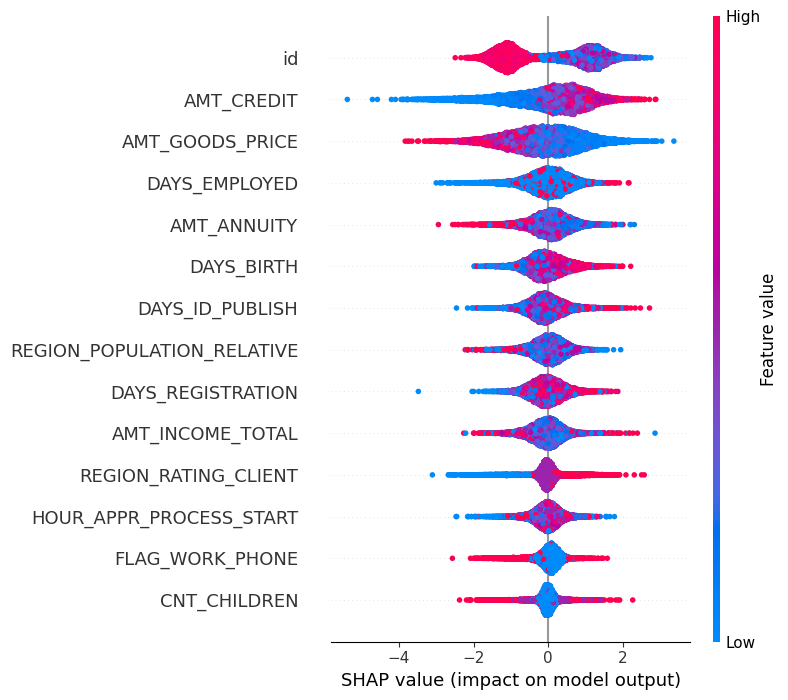

In [21]:
explainer = shap.Explainer(generated_pipeline, X_train)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)